### [3 x n 타일링](https://school.programmers.co.kr/learn/courses/30/lessons/12902?language=python3)

- 점화식 기반으로 재귀적으로 풀이 -> 큰 n을 대상으로 할 경우 시간초과

In [7]:
def solution(n):
    
    if n == 0:
        return 1
    if n == 2:
        return 3
    if n < 2:
        return 0

    # 점화식: T(n) = 3 * T(n-2) + 2 * (T(n-4) + T(n-6) + ...)
    result = 3 * solution(n - 2)
    i = 4
    while i <= n:
        result += 2 * solution(n - i)
        i += 2
    
    return result % 1_000_000_007

- DP를 이용해 조금 더 최적화  
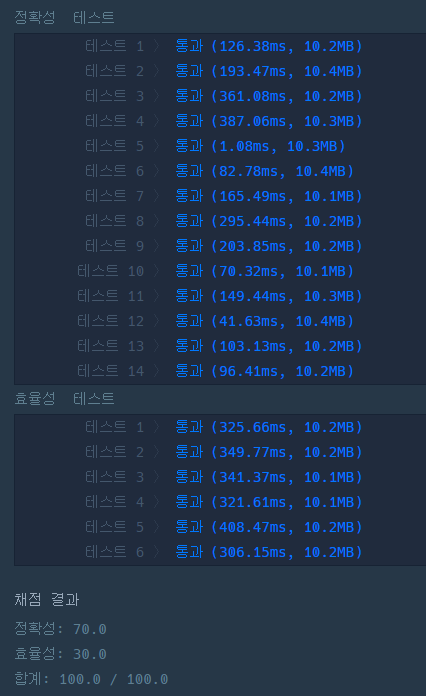

In [3]:
def solution(n):
    if n % 2 != 0:
        return 0  # 홀수일 경우 타일을 채울 수 없으므로 0 반환

    MOD = 1_000_000_007

    # DP 테이블 초기화
    dp = [0] * (n + 1)
    dp[0] = 1  # 아무 타일도 놓지 않은 경우는 1가지
    if n >= 2:
        dp[2] = 3  # 2칸을 채우는 방법은 3가지
    
    for i in range(4, n + 1, 2):
        dp[i] = dp[i - 2] * 3
        for j in range(4, i + 1, 2):
            dp[i] += dp[i - j] * 2
        dp[i] %= MOD  # 나머지 연산

    return dp[n] % 1_000_000_007

41


- 다른 사람의 풀이....감탄...

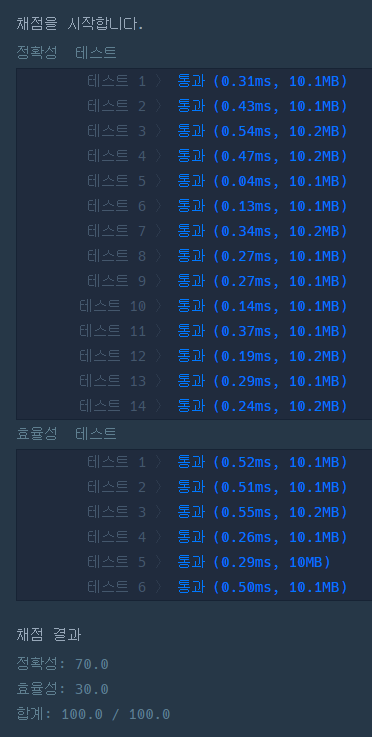

In [10]:
def solution(n):
    if n % 2:
        return 0
    front = back = 1
    for _ in range(n//2):
        front, back = back, (4*back - front) % 1000000007
    return back

- 위 코드에 사용된 수식은 아래와 같음.  
T(n)=4×T(n−2)−T(n−4)

### [퍼즐 게임 챌린지](https://school.programmers.co.kr/learn/courses/30/lessons/340212)

In [20]:
def solution(diffs, times, limit):
    level = max(diffs)
    while True:
        spend = 0
        prev_time = 0
        
        for (diff, time) in zip(diffs, times):
            if spend >= limit:
                return level+1
            
            if level >= diff:
                spend += time
                prev_time = time
            else :
                prev_time += time
                spend += prev_time * (diff - level) + time
                prev_time = time            
            
        if spend == limit:
            return level
        elif spend > limit:
            return level+1
        elif spend < limit:
            level -= 1
            continue

In [22]:
test = [1,2,3]

{x:True if x==1 else False for x in test}

{1: True, 2: False, 3: False}

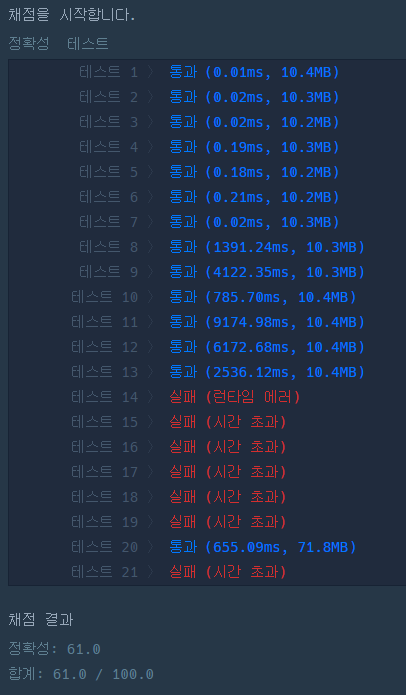

In [62]:
def solution(diffs, times, limit):
    target = [[diff, time, times[idx-1]] for idx, (diff, time) in enumerate(zip(diffs, times))]
    target = sorted(target, key=lambda x: x[0], reverse=True)
    
    for level in sorted(diffs, reverse=True):
        spend = sum([cur_time if diff <= level else (cur_time+prev_time)*(diff-level)+cur_time for diff, cur_time, prev_time in target])
        if spend <= limit:    
            n = 0
            while True:
                if spend == limit:
                    return level
                elif spend < limit:
                    # 다음 문제가 풀렸을 때의 난이도 하락분
                    while True:
                        diff, cur_time, prev_time = target[n]
                        if diff < level:
                            n -= 1
                            diff, cur_time, prev_time = target[n]
                            next_gap = (cur_time+prev_time)*(diff-level)+cur_time
                            if spend < limit:
                                break
                            elif spend - next_gap < limit:
                                level = diff
                            break
                        n += 1

                    level -= 1
                    
                elif spend > limit:
                    return level+1
                    
                spend = sum([cur_time if diff <= level else (cur_time+prev_time)*(diff-level)+cur_time for diff, cur_time, prev_time in target])
            

In [63]:
diffs, times, limit = [1, 99999, 100000, 99995], [9999, 9001, 9999, 9001], 3456789012
solution(diffs, times, limit)

[[100000, 9999, 9001], [99999, 9001, 9999], [99995, 9001, 9999], [1, 9999, 9001]]
level=100000, spend=38000, next_gap=9999
level=99999, spend=57000, next_gap=9001
level=99998, spend=95000, next_gap=28001
level=99997, spend=133000, next_gap=47001
level=99996, spend=171000, next_gap=66001
level=99995, spend=209000, next_gap=9001
level=99994, spend=266000, next_gap=28001
level=99993, spend=323000, next_gap=47001
level=99992, spend=380000, next_gap=66001
level=99991, spend=437000, next_gap=85001
level=99990, spend=494000, next_gap=104001
level=99989, spend=551000, next_gap=123001
level=99988, spend=608000, next_gap=142001
level=99987, spend=665000, next_gap=161001
level=99986, spend=722000, next_gap=180001
level=99985, spend=779000, next_gap=199001
level=99984, spend=836000, next_gap=218001
level=99983, spend=893000, next_gap=237001
level=99982, spend=950000, next_gap=256001
level=99981, spend=1007000, next_gap=275001
level=99980, spend=1064000, next_gap=294001
level=99979, spend=1121000, 

39354